In [8]:
# This script runs on local computer completely

# Download model
# ollama pull qwen2.5:3b-instruct

# Install langgraph supervisor
# !pip install langgraph_supervisor

# python -V  
# Python 3.12.7

In [26]:
from langchain_ollama import ChatOllama

# initialize
local_llm = "qwen2.5:3b-instruct"
# https://smith.langchain.com/public/64099131-709f-4475-9d2a-89079212d9c2/r
model = ChatOllama(model=local_llm, temperature=0.0)

In [27]:
# Use multiple agents to handle separate concerns
# specialized agent can handle specified task

# Tools
def add(a: float, b: float) -> float:
    """Add two numbers"""
    return a + b

def multiply(a: float, b: float) -> float:
    """Multiply two numbers"""
    return a * b

def web_search(query: str) -> str:
    """Search the web for information"""
    return (
        "Here are the headcounts for each of the FAANG companies in 2024:\n"
        "1. **Facebook (Meta)**: 67317 employees.\n"
        "2. **Apple**: 164,000 employees.\n"
        "3. **Amazon**: 1,551,000 employees.\n"
        "4. **Netflix**: 14,000 employees. \n"
        "5. **Google** (Alphabet)**: 181,269 employees."
    )

In [28]:
# Agents
from langgraph.prebuilt import create_react_agent

math_agent = create_react_agent(
    model=model,
    tools=[add, multiply],
    name="math_expert",  # descriptive name
    prompt="You are a math expert. You have access to two tools: add and multiply. Call these tools to perform the tasks."
)

research_agent = create_react_agent(
    model=model,
    tools=[web_search],
    name="research_expert",
    prompt="You are a researcher with access to one tool: web_search. Call this tool to find information about. "
)

In [29]:
# Supervisor
from langgraph_supervisor import create_supervisor

prompt = (
    "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent."
)

math_research_workflow = create_supervisor(
    [research_agent, math_agent],
    model=model,
    output_mode="full_history", # (full_history or last_message)
    prompt=prompt,
)

app = math_research_workflow.compile()


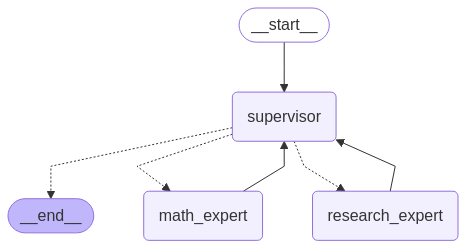

In [30]:
# visualizatin
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
# Invoke
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what's the combined headcount of FAANG companies in 2024?"
        }
    ]
})


In [32]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

what's the combined headcount of FAANG companies in 2024?
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_expert (4b954998-a75b-4abc-bafc-4ac1e7258eab)
 Call ID: 4b954998-a75b-4abc-bafc-4ac1e7258eab
  Args:
================================= Tool Message =================================
Name: transfer_to_research_expert

Successfully transferred to research_expert
================================== Ai Message ==================================
Name: research_expert
Tool Calls:
  web_search (3ba88fbf-2e67-48f5-9d71-a21554cffd0f)
 Call ID: 3ba88fbf-2e67-48f5-9d71-a21554cffd0f
  Args:
    query: combined headcount FAANG companies 2024
================================= Tool Message =================================
Name: web_search

Here are the headcounts for each of the FAANG companies in 2024:
1. **Facebook (Meta)**: 67317

In [35]:
result

{'messages': [HumanMessage(content="what's the combined headcount of FAANG companies in 2024?", additional_kwargs={}, response_metadata={}, id='37e33392-a27a-4210-bdc1-e730ef40926c'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'qwen2.5:3b-instruct', 'created_at': '2025-05-04T20:34:53.312364Z', 'done': True, 'done_reason': 'stop', 'total_duration': 12481129443, 'load_duration': 50433221, 'prompt_eval_count': 228, 'prompt_eval_duration': 3410802968, 'eval_count': 127, 'eval_duration': 9011824278, 'model_name': 'qwen2.5:3b-instruct'}, name='supervisor', id='run--c33ad2f4-01f9-43f6-a147-3958de3188e4-0', tool_calls=[{'name': 'transfer_to_research_expert', 'args': {}, 'id': '4b954998-a75b-4abc-bafc-4ac1e7258eab', 'type': 'tool_call'}], usage_metadata={'input_tokens': 228, 'output_tokens': 127, 'total_tokens': 355}),
  ToolMessage(content='Successfully transferred to research_expert', name='transfer_to_research_expert', id='3d4d5e08-232e-43f9-bfb6-ad4f57a931e0',